In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# **Exploratory Data Analysis**

In [4]:
df2.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [5]:
df2.columns

Index(['col1', 'col2', 'output'], dtype='object')

In [6]:
df2.shape

(1278, 3)

In [7]:
df2['output'].value_counts()

1    770
0    508
Name: output, dtype: int64

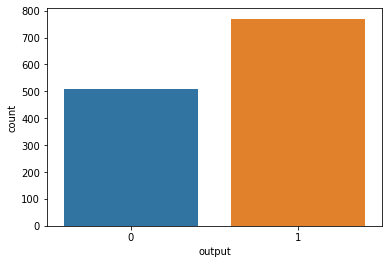

In [8]:
sns.countplot(x = 'output',data = df2)

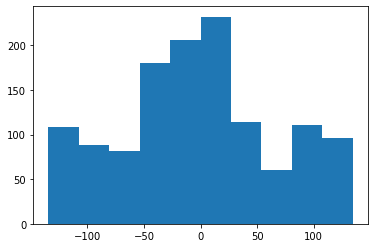

In [9]:
plt.hist(x = 'col1',data = df2)
plt.show()

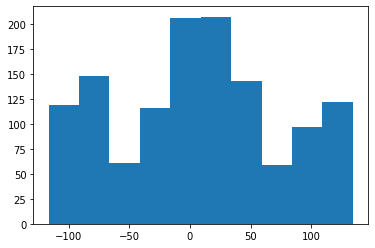

In [10]:
plt.hist(x = 'col2',data = df2)
plt.show()

# **Data Preparation**

**Splitting the data into train & test**

In [11]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df2,test_size=0.3,random_state=42)

In [12]:
train.head()

,col1,col2,output
964,-0.554427,-1.191799,0
3,-36.378005,95.616515,1
111,-126.279591,-28.619885,1
679,-4.656697,-89.962599,1
1102,26.633331,48.000000,0


In [13]:
train.shape

(894, 3)

In [14]:
test.head()

,col1,col2,output
210,40.855663,-110.480042,1
430,-8.550488,-102.408326,1
1147,-56.019534,5.361171,0
1270,5.633331,5.000000,0
1213,36.084174,-6.385722,0


In [15]:
test.shape

(384, 3)

# **Model Building and Evaluation.**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [17]:
x_train = train.drop('output',axis = 1)
x_train.head()

,col1,col2
964,-0.554427,-1.191799
3,-36.378005,95.616515
111,-126.279591,-28.619885
679,-4.656697,-89.962599
1102,26.633331,48.000000


In [18]:
y_train = train['output']
y_train.head()

964     0
3       1
111     1
679     1
1102    0
Name: output, dtype: int64

In [19]:
x_test = test.drop('output',axis = 1)
x_test.head()

,col1,col2
210,40.855663,-110.480042
430,-8.550488,-102.408326
1147,-56.019534,5.361171
1270,5.633331,5.000000
1213,36.084174,-6.385722


In [20]:
y_test = test['output']
y_test.head()

210     1
430     1
1147    0
1270    0
1213    0
Name: output, dtype: int64

**Logistic Regression**

In [21]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("accuracy score of Logistic Regression " + str(accuracy))

accuracy score of Logistic Regression 0.6119791666666666


**SVM Linear Kernel**

In [28]:
svclinear = SVC(kernel='linear')
svclinear.fit(x_train,y_train)
y_pred_svcL = svclinear.predict(x_test)
accuracy_SVCL = accuracy_score(y_pred_svcL,y_test)
print("accuracy score of SVM with Linear Kernel " + str(accuracy_SVCL))

accuracy score of SVM with Linear Kernel 0.6119791666666666


**SVM RBF Kernel**

In [40]:
svcRBF = SVC(kernel='rbf')
svcRBF.fit(x_train,y_train)
y_pred_svcRBF = svcRBF.predict(x_test)
accuracy_SVCRBF = accuracy_score(y_pred_svcRBF,y_test)
print("accuracy score of SVM with RBF Kernel " + str(accuracy_SVCRBF))

accuracy score of SVM with RBF Kernel 1.0


# **Model Evaluation**

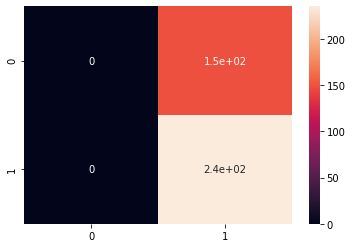

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)


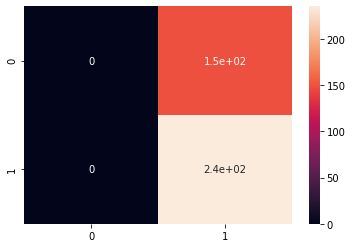

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred_svcL), annot = True)


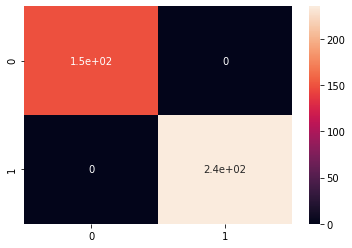

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_svcRBF), annot = True)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.61      1.00      0.76       235

    accuracy                           0.61       384
   macro avg       0.31      0.50      0.38       384
weighted avg       0.37      0.61      0.46       384



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(classification_report(y_test, y_pred_svcL))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.61      1.00      0.76       235

    accuracy                           0.61       384
   macro avg       0.31      0.50      0.38       384
weighted avg       0.37      0.61      0.46       384



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print(classification_report(y_test, y_pred_svcRBF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       235

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384




1.   ### As shown in the heatmap of confusion matrix as well as the classfication report of the 3 models. It is evident that SVM with RBF kernel is better model than SVM with linear kernel and Logistic Regression. 
2.   ### SVM with RBF kernel shows the true negative values. but other models doesn't.

# **Saving the model**

In [49]:
from pickle import dump

dump(model, open('model.pkl','wb'))